In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTING DATASET
dataset = pd.read_csv('/content/drive/MyDrive/apple_share_price.csv',usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])# display from lower to higher
print(dataset)


        Open    High     Low   Close
1663   46.52   47.18   46.41   47.08
1662   47.49   47.50   46.88   47.33
1661   47.08   47.76   47.07   47.71
1660   47.82   47.89   47.56   47.68
1659   47.71   48.05   47.41   48.02
...      ...     ...     ...     ...
4     157.06  158.92  156.67  158.81
3     158.60  161.83  158.27  160.08
2     159.26  161.27  159.11  161.06
1     159.90  160.00  154.63  155.32
0     156.60  158.57  156.07  157.48

[1664 rows x 4 columns]


In [ ]:
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))#normalization
dataset = scaler.fit_transform(dataset)#all the valus in dataset coneverted in between 0 and 1 so the process become fast

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [ ]:
# split a multivariate sequence into samples
def create_dataset(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):

# find the end of this pattern
    end_ix = i + n_steps
# check if we are beyond the dataset
    if end_ix > len(sequences)-1:  #if the value goes beyond the training dataset then the iteration stops
      break
# gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)# returns as a matrix

In [ ]:
# reshape into X=t and Y=t+1
look_back = 2 # n_steps
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1112, 2, 4)
(1112, 4)
(548, 2, 4)
(548, 4)


In [ ]:
# define model
n_features = trainX.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True,input_shape=(look_back, n_features)))#100 hidden layers,relu because the dataset is non linear (max(0),x),instead of return_sequence= True we can use repeat layer
model.add(LSTM(256, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')#optimization and initialisation are responsible for compile function
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 100)            42000     
                                                                 
 lstm_1 (LSTM)               (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 4)                 1028      
                                                                 
Total params: 408596 (1.56 MB)
Trainable params: 408596 (1.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=100, verbose=2)

Epoch 1/100
12/12 - 9s - loss: 0.1121 - val_loss: 0.3497 - 9s/epoch - 717ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0739 - val_loss: 0.1744 - 324ms/epoch - 27ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0215 - val_loss: 0.0019 - 307ms/epoch - 26ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0110 - val_loss: 0.0201 - 298ms/epoch - 25ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0051 - val_loss: 6.0971e-04 - 298ms/epoch - 25ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0011 - val_loss: 0.0028 - 278ms/epoch - 23ms/step
Epoch 7/100
12/12 - 0s - loss: 6.2171e-04 - val_loss: 0.0031 - 342ms/epoch - 28ms/step
Epoch 8/100
12/12 - 0s - loss: 3.5151e-04 - val_loss: 0.0023 - 313ms/epoch - 26ms/step
Epoch 9/100
12/12 - 0s - loss: 2.6553e-04 - val_loss: 0.0020 - 317ms/epoch - 26ms/step
Epoch 10/100
12/12 - 0s - loss: 2.3457e-04 - val_loss: 0.0015 - 334ms/epoch - 28ms/step
Epoch 11/100
12/12 - 0s - loss: 2.1208e-04 - val_loss: 0.0012 - 287ms/epoch - 24ms/step
Epoch 12/100
12/12 - 0s - loss: 2.1145e-04 - val_loss: 0.0012 -

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict)
print(testPredict)

18/18 [==============================] - 0s 11ms/step
[[0.01583347 0.01798651 0.0197567  0.01756673]
 [0.01869004 0.02082746 0.02253278 0.02040694]
 [0.02062028 0.02274899 0.02441763 0.02231326]
 ...
 [0.7435602  0.74001855 0.73649836 0.7340113 ]
 [0.7422288  0.73867065 0.7350759  0.73251987]
 [0.73577887 0.7322996  0.72873527 0.7262081 ]]
[[0.7214485  0.71816736 0.71477    0.7123558 ]
 [0.7309987  0.7276111  0.7241084  0.7216325 ]
 [0.7274119  0.7240082  0.7204206  0.7178759 ]
 ...
 [1.0238503  1.0169501  1.0121408  1.0079917 ]
 [1.037953   1.0308577  1.0259304  1.0216416 ]
 [1.027479   1.020296   1.0153127  1.0111259 ]]


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
print(trainPredict)
print(trainY)
print(testPredict)
print(testY)

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY,trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1671285530098.67 RMSE
Test Score: 2443952089556.23 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] =trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset),:] = testPredict

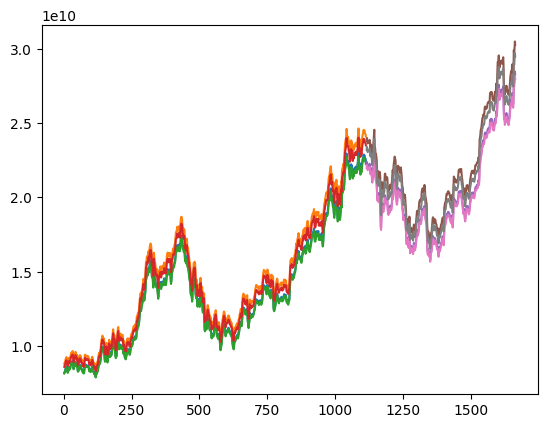

In [ ]:
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()